In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_index = pd.read_csv('intrest_rate.csv',sep=';')
df_index.head()

,lp,year,month,intrest_rate,uneployment_rate,index_price
0,1,2015,Jan,0.25,5.7,2050
1,2,2015,Feb,0.25,5.5,2070
2,3,2015,Mar,0.25,5.4,2085
3,4,2015,Apr,0.25,5.3,2100
4,5,2015,Mai,0.25,5.2,2120


In [4]:
df_index.drop(columns=['lp','year','month'],axis=1,inplace=True)

In [5]:
df_index.head()

,intrest_rate,uneployment_rate,index_price
0,0.25,5.7,2050
1,0.25,5.5,2070
2,0.25,5.4,2085
3,0.25,5.3,2100
4,0.25,5.2,2120


In [6]:
df_index.isnull().sum()

intrest_rate        0
uneployment_rate    0
index_price         0
dtype: int64

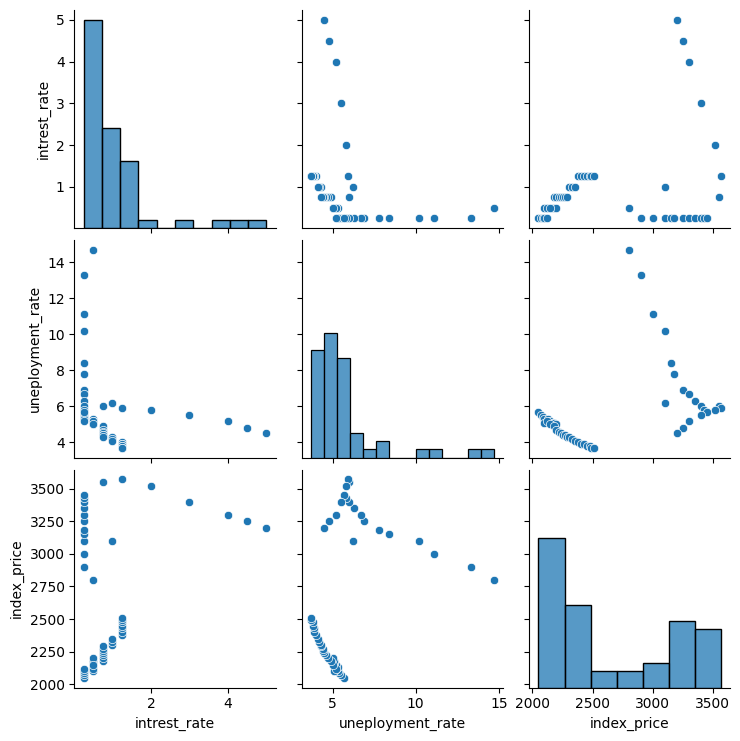

In [7]:
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,intrest_rate,uneployment_rate,index_price
intrest_rate,1.000000,-0.268066,0.303146
uneployment_rate,-0.268066,1.000000,0.362796
index_price,0.303146,0.362796,1.000000


In [9]:
## visualization datapoints more closely

Text(0, 0.5, 'unemployment')

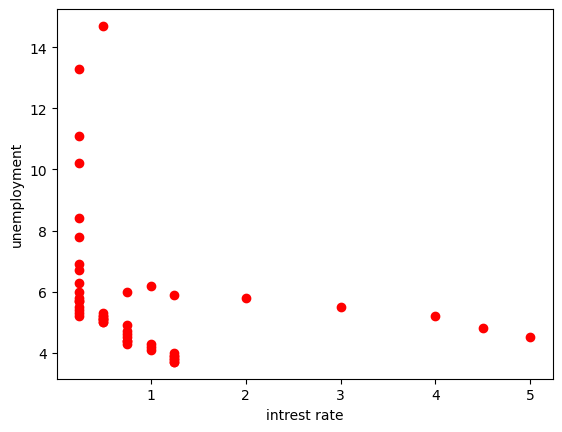

In [10]:
plt.scatter(df_index['intrest_rate'],df_index['uneployment_rate'],color='r')
plt.xlabel("intrest rate")
plt.ylabel("unemployment")

In [11]:
## independent and dependent features
x = df_index.iloc[::-1] 
y = df_index.iloc[:,-1] 

In [12]:
x.head()

,intrest_rate,uneployment_rate,index_price
49,5.0,4.5,3200
48,4.5,4.8,3250
47,4.0,5.2,3300
46,3.0,5.5,3400
45,2.0,5.8,3520


In [13]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='intrest_rate', ylabel='index_price'>

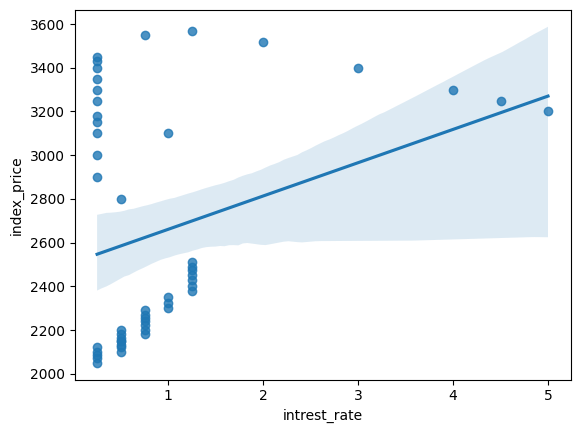

In [14]:
sns.regplot(x=df_index['intrest_rate'],y=df_index['index_price'])

<Axes: xlabel='intrest_rate', ylabel='uneployment_rate'>

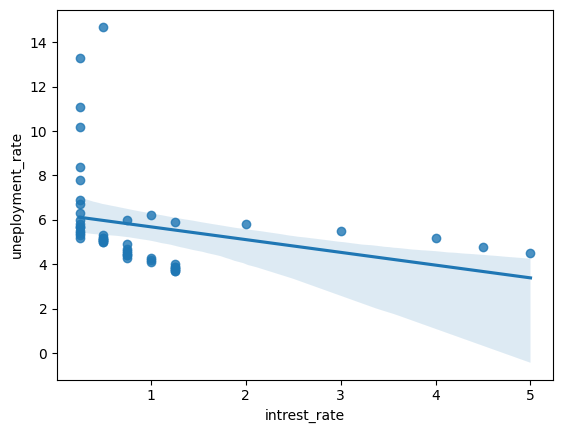

In [15]:
sns.regplot(x=df_index['intrest_rate'],y=df_index['uneployment_rate'])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [19]:
regression.fit(x_train,y_train)

LinearRegression()

In [20]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [21]:
np.mean(validation_score)

np.float64(-85746.874309505)

In [23]:
## prediction
y_pred = regression.predict(x_test)
y_pred

array([2206.5815286 , 3080.6115593 , 2883.92598763, 3102.95148659,
       2426.87651788, 3144.10714642, 2730.42985732, 2713.9143122 ,
       2913.02799602, 2159.80697461, 2150.2423532 , 1650.89848986,
       3038.92308765])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

59663.609800458136
199.60367947327313
244.26135551998016


In [26]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7656084360116271


In [27]:
#display adjuster R-squered
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6874779146821695

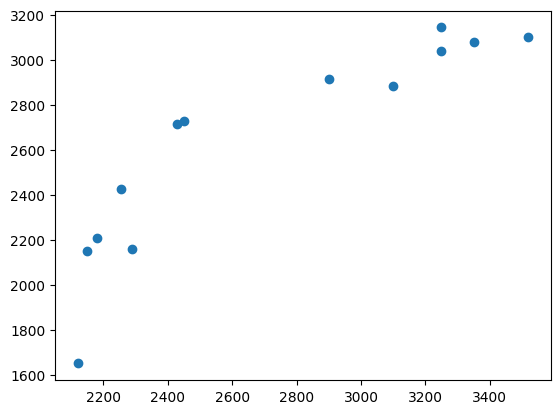

In [28]:
## Assumptions
plt.scatter(y_test,y_pred)

In [30]:
residuals = y_test - y_pred
print(residuals)

13    -26.581529
39    269.388441
30    216.074012
45    417.048513
17   -171.876518
48    105.892854
26   -280.429857
25   -283.914312
32    -13.027996
19    130.193025
12     -0.242353
4     469.101510
37    211.076912
Name: index_price, dtype: float64


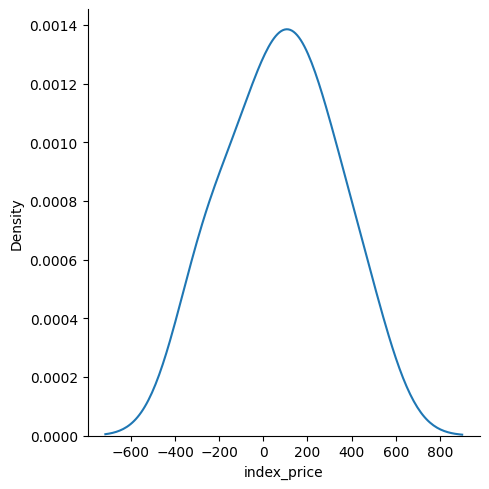

In [31]:
sns.displot(residuals,kind='kde')

In [32]:
#scatter plot with respect to predict and residuals

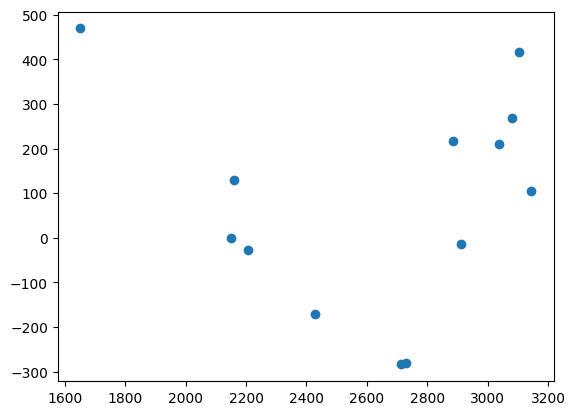

In [33]:
plt.scatter(y_pred,residuals)

In [34]:
import statsmodels.api as sm 
model = sm.OLS(y_train,x_train).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):             -0.058
Method:                 Least Squares   F-statistic:                             0.3287
Date:                Sun, 04 May 2025   Prob (F-statistic):                       0.805
Time:                        13:58:10   Log-Likelihood:                         -344.08
No. Observations:                  37   AIC:                                      694.2
Df Residuals:                      34   BIC:                                      699.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -81.5254    520.553     -0.157      0.876   -1139.416     976.365
x2            -6.3540    525.575     -0.012      0.990   -1074.452    1061.744
x3          -417.0933    533.416     -0.782      0.440   -1501.124     666.937
==============================================================================
Omnibus:                        3.717   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                1.916
Skew:                          -0.262   Prob(JB):                        0.384
Kurtosis:                       2.016   Cond. No.                         1.83
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(regression.coef_)    

[ -81.52541042   -6.35401221 -417.09331204]
